In [2]:
from keybert import KeyBERT
import re
doc = open("sample_70.txt", "r").read()
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc, top_n=100)

In [4]:
doc[0:100]

'SubName: Full=(African queen) hypothetical protein CAUTION: The sequence shown here is derived from '

In [26]:
# Define the search pattern with a regular expression
#word_to_find = "venom"
word_to_find = "transposon"
pattern = re.compile(fr'(\b{re.escape(word_to_find)}\b)', re.IGNORECASE)

# Find all occurrences of the word in the text
matches = pattern.finditer(doc)

if matches:
    print(f"The word '{word_to_find}' was found {len(list(matches))} times in the text.")
    for match in pattern.finditer(doc):
        match_text = match.group(1)
        start, end = match.span(1)
        surrounding_text = doc[max(0, start - 150):end + 250]  # Adjust the context length as needed
        print(f"Match: '{match_text}'")
        print(f"Context: '{surrounding_text}'")
        print()
else:
    print(f"The word '{word_to_find}' was not found in the text.")

The word 'transposon' was found 44 times in the text.
Match: 'transposon'
Context: 'L4 family. {ECO:0000256|ARBA:ARBA00011025}. Metal-binding Reference proteome Zinc Zinc-finger SubName: Full=Putative RNA-directed DNA polymerase from transposon BS-like Protein Nucleotidyltransferase Reference proteome RNA-directed DNA polymerase Transferase Transposable element RecName: Full=Cytoplasmic FMR1-interacting protein SIMILARITY: Belongs to the CYFIP family. {ECO:0000256|ARBA:ARBA00025790, ECO:00'

Match: 'Transposon'
Context: '23}. SIMILARITY: Belongs to the PUR DNA-binding protein family. {ECO:0000256|ARBA:ARBA00009251}. DNA-binding Nucleus Reference proteome SubName: Full=Transposon Tf2-9 polyprotein CAUTION: The sequence shown here is derived from an EMBL/GenBank/DDBJ whole genome shotgun (WGS) entry which is preliminary data. {ECO:0000313|EMBL:KII66374.1}. Metal-binding Reference proteome Zinc Zinc-finger SubName: Full=Unchar'

Match: 'Transposon'
Context: '4 subfamily. {ECO:0000256|Rule

In [27]:
kw_model.extract_keywords(doc, keyphrase_ngram_range=(3, 3), stop_words='english',
                              use_mmr=True, diversity=0.7)

KeyboardInterrupt: 

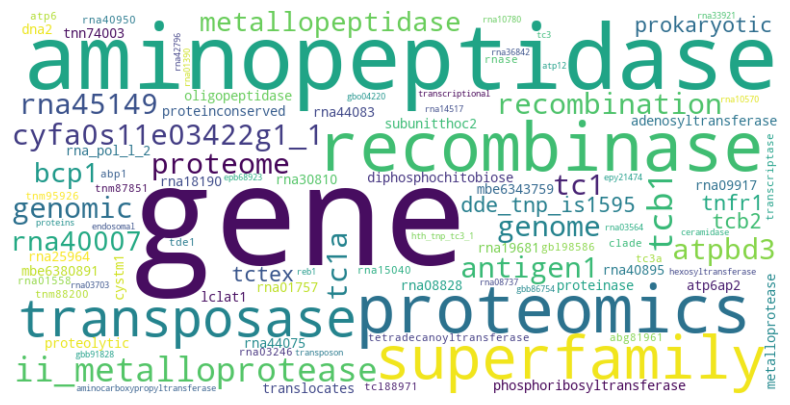

In [40]:
from collections import defaultdict
counts = defaultdict(int)
for w in doc.split():
    counts[w] += 1
text = " ".join([el[0] for el in counts.items() if 50 < el[1] < 100])
text = " ".join([el[0] for el in keywords])
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [24]:
len(keywords)

20

In [23]:
len(doc)

2904297